In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from collections import Counter
from infomap import Infomap
from operator import itemgetter

In [2]:
data = pd.read_csv('./connections.txt',delimiter=' ',names = ['from','to'])
data.head()

,from,to
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


## 1) Create a Directed graph

In [3]:
directed_graph = nx.DiGraph()
directed_graph.add_edges_from(data.to_numpy())

## 2) Show which nodes are bridges. 

In [4]:
bridge_edges =list(nx.bridges(directed_graph.to_undirected()))
merged = list(itertools.chain(*bridge_edges))
bridge_nodes = set(merged)
print(bridge_nodes)

{0, 2569, 11, 12, 15, 18, 1560, 2079, 2596, 37, 550, 43, 1581, 3650, 1096, 585, 74, 602, 1119, 607, 608, 613, 107, 3183, 624, 114, 1145, 3709, 638, 3729, 2195, 1684, 668, 3230, 674, 3748, 686, 692, 1206, 698, 209, 210, 3798, 215, 2269, 3820, 3853, 3856, 2842, 287, 801, 292, 1834, 335, 348, 3935, 358, 1386, 875, 3437, 883, 1912, 3451, 891, 3453, 892, 3974, 3980, 911, 3984, 918, 2457, 414, 2470, 4008, 4010, 4015, 4022, 4024, 1466, 447, 4035, 3031, 3570, 3071}


### Here you can see the bridge nodes. Bridge nodes in a network are crucial points of connection between different components, playing a key role in maintaining the network's connectivity and flow of information.

## 3) Show the density of the graph. Comment about your findings 

In [5]:
nx.density(directed_graph)

0.0054099817517196435

### The graph's density of 0.0054 indicates it is quite sparse, with relatively few connections compared to the maximum possible number of connections in the network.

## 4) Show which nodes have the highest and lowest number of connections. 

In [6]:
edges = dict(directed_graph.degree())
highest_connections = sorted(edges, key = edges.get, reverse = True)[:5]
lowest_connections = sorted(edges, key = edges.get, reverse = False)[:5]
print("Keys for nodes with highest conections", highest_connections)
print("Keys for nodes with lowest conections", lowest_connections)

Keys for nodes with highest conections [107, 1684, 1912, 3437, 0]
Keys for nodes with lowest conections [11, 12, 15, 18, 37]


### Nodes 107, 1684, 1912, 3437, and 0 have the most connections, indicating their central role in the network. Nodes 11, 12, 15, 18, and 37 have the fewest, suggesting peripheral positions.

## 5) Show which nodes have the highest incoming and outgoing connections 

In [7]:
highest_incoming_connections = dict(directed_graph.in_degree())
highest_outgoing_connections = dict(directed_graph.out_degree())

top_5_in = sorted(highest_incoming_connections, key = highest_incoming_connections.get, reverse = True)[:5]
top_5_out = sorted(highest_outgoing_connections, key = highest_outgoing_connections.get, reverse = True)[:5]
print("Keys for nodes with highest incoming connections ", top_5_in)
print("Keys for nodes with highest outgoing connections ", top_5_out)

Keys for nodes with highest incoming connections  [1888, 2543, 1800, 2611, 1827]
Keys for nodes with highest outgoing connections  [107, 1684, 1912, 3437, 0]


### Nodes 1888, 2543, 1800, 2611, and 1827 receive the most connections, indicating high influence or popularity. Nodes 107, 1684, 1912, 3437, and 0 send the most connections, showing active engagement or outreach.

## 6) Show which nodes have the highest closeness, betweenness, and eigenvector . Interpret your findings.

In [8]:
betweenness = nx.centrality.betweenness_centrality(directed_graph)
highest_betweenness_node = max(directed_graph.nodes, key=betweenness.get)
b=betweenness[highest_betweenness_node]
print("Highest Betweenness Node: {} {}Betweenness: {}".format(highest_betweenness_node,'\n',b ,'\n'))

closeness = nx.centrality.closeness_centrality(directed_graph)
highest_closeness_node = max(directed_graph.nodes, key=closeness.get)
c=closeness[highest_closeness_node]
print("Highest Closeness Node: {} {}Closeness: {}".format(highest_closeness_node,'\n',c,'\n'))


eigenvector = nx.centrality.eigenvector_centrality(directed_graph, max_iter = 800)
highest_eigenvector_node = max(directed_graph.nodes, key=eigenvector.get)
e=eigenvector[highest_eigenvector_node]
print("Highest Eigan Vector Node: {} {}Eigan Vector: {}".format(highest_eigenvector_node, '\n', e))

Highest Betweenness Node: 1684 
Betweenness: 0.03299985344063623
Highest Closeness Node: 2642 
Closeness: 0.11797503012816456
Highest Eigan Vector Node: 2655 
Eigan Vector: 0.802704299670652


### In the network, Node 1684 has the highest betweenness centrality, indicating it often acts as a bridge or connector between different parts of the network. It's crucial for information flow or connectivity across the network. Node 2642, with the highest closeness centrality, suggests it can quickly interact with or reach other nodes, making it central in terms of communication or influence spreading. Lastly, Node 2655, leading in eigenvector centrality, is influential due to its connections to other significant nodes, showing it's a part of a prominent cluster or group in the network.

## 7) Implement a community detection algorithm on the directed graph and show how many communities were created. 

In [9]:
def findCommunities(graph):
    im = Infomap("--two-level --directed")
    print("Building Infomap network from a NetworkX graph...")
    for e in graph.edges():
        im.addLink(*e)
    print("Find communities with Infomap...")
    im.run();
    print("Found {0} communities with codelength: {1}".format(im.num_top_modules,
    im.codelength))
    communities = {}
    for node in im.tree:
        communities[node.node_id] = node.module_id
    nx.set_node_attributes(graph, communities,'community')
    return im.num_top_modules, communities
v=findCommunities(directed_graph)
print("Found", v[0], "communities")

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 96 communities with codelength: 6.58817364825253
Found 96 communities


### The Infomap algorithm is designed to discover communities within the graph. A community in network terms refers to a group of nodes that are more densely connected to each other than to nodes outside the group. The algorithm found a total of 96 distinct communities, indicating that the graph is composed of various tightly-knit groups. The "codelength" mentioned is a technical measure used by Infomap to assess the quality of the community division it found. Codelength of approximately 6.59 suggests that the community structure found by Infomap is relatively efficient, meaning that the nodes are well-organized into communities.

## 8.Show the largest and the smallest community. | Interpret your findings

In [10]:
c = Counter(v[1].values())

highest_community = sorted(c, key = c.get, reverse = True)[:1]
lowest_community = sorted(c, key = c.get, reverse = False)[:1]
print("The largest community is", highest_community)
print("The smallest community is", lowest_community)

The largest community is [5]
The smallest community is [36]


### The largest community, labeled as 5, has the most members, indicating it may be a central or dominant group in the network. The smallest community, labeled as 36, with fewer members, could represent a niche or specialized group within the network.

### 9) Select the largest three communities and draw them. After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality,  and Eigenvector. Each should be in a separate plot/draw.

In [11]:
def find_communities(graph):
    im = Infomap("--two-level --directed")
    for e in graph.edges():
        im.add_link(*e)
    im.run()
    communities = {node.node_id: node.module_id for node in im.tree}
    nx.set_node_attributes(graph, communities, 'community')
    return im.num_top_modules, communities

num_communities, communities = find_communities(directed_graph)


community_counts = Counter(communities.values())
highest_three_community = sorted(community_counts, key=community_counts.get, reverse=True)[:3]
highest_three_community

[5, 2, 3]

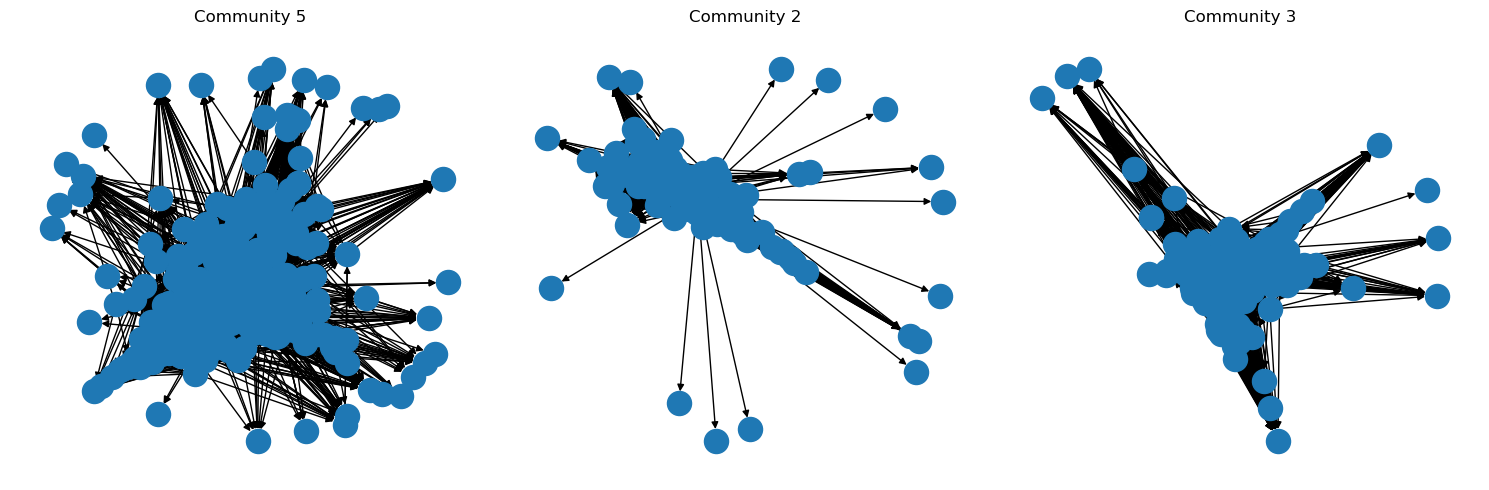

[5, 2, 3]

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, community in enumerate(highest_three_community):
    selected_nodes = [n for n, d in directed_graph.nodes(data=True) if d['community'] == community]
    sg = directed_graph.subgraph(selected_nodes)
    pos = nx.spring_layout(sg, seed=500)
    nx.draw(sg, pos=pos, ax=axs[i])
    axs[i].set_title(f'Community {community}')

plt.tight_layout()
plt.show()

highest_three_community 

In [13]:
removed_nodes = []

for community in highest_three_community:
    selected_nodes = [n for n, d in directed_graph.nodes(data=True) if d['community'] == community]
    sg = directed_graph.subgraph(selected_nodes)
    degree_centrality = nx.degree_centrality(sg)
    top_3_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:3]
    removed_nodes.extend(top_3_nodes)

len(removed_nodes)

9

### Now let's remove the top 3 nodes with the highest degree centrality for each community

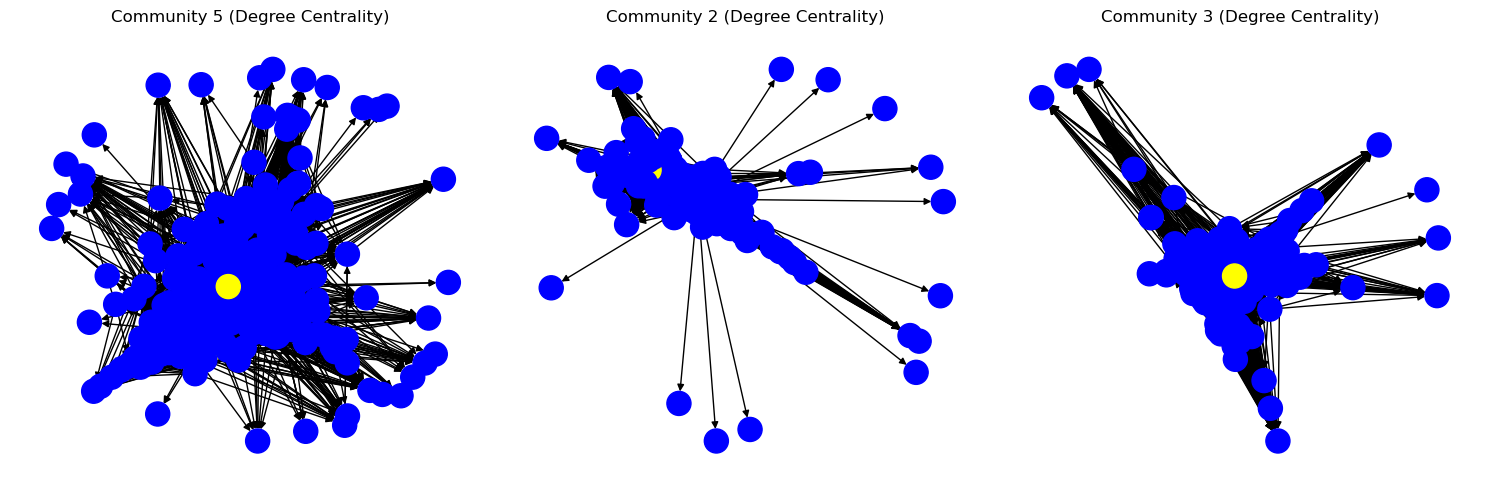

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, community in enumerate(highest_three_community):
    selected_nodes = [n for n, d in directed_graph.nodes(data=True) if d['community'] == community]
    sg = directed_graph.subgraph(selected_nodes)
    node_colors = ['yellow' if node in removed_nodes else 'blue' for node in sg]
    pos = nx.spring_layout(sg, seed=500)
    nx.draw(sg, pos=pos, node_color=node_colors, ax=axs[i])
    axs[i].set_title(f'Community {community} (Degree Centrality)')

plt.tight_layout()
plt.show()

In [15]:
len(removed_nodes)

9

### Now let's remove the top 3 nodes with the highest closeness centrality for each community

In [16]:
for community in highest_three_community:
    selected_nodes = [n for n, d in directed_graph.nodes(data=True) if d['community'] == community]
    sg = directed_graph.subgraph(selected_nodes)
    closeness_centrality = nx.closeness_centrality(sg)
    top_3_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:3]
    removed_nodes.extend(top_3_nodes)

len(removed_nodes)

18

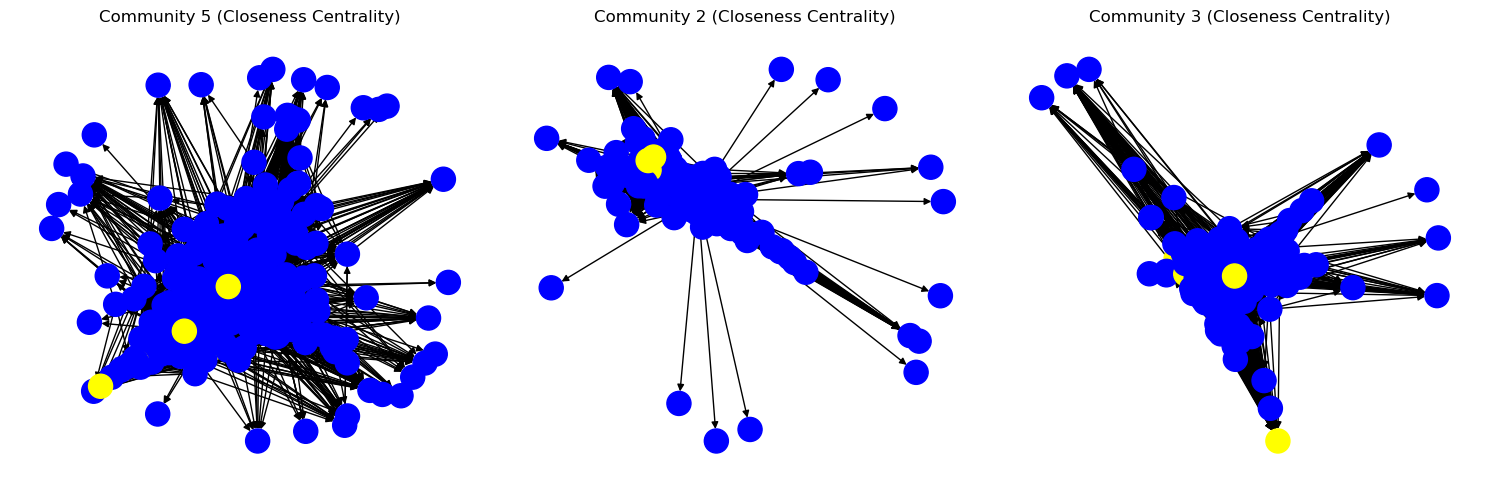

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, community in enumerate(highest_three_community):
    selected_nodes = [n for n, d in directed_graph.nodes(data=True) if d['community'] == community]
    sg = directed_graph.subgraph(selected_nodes)
    node_colors = ['yellow' if node in removed_nodes else 'blue' for node in sg]
    pos = nx.spring_layout(sg, seed=500)
    nx.draw(sg, pos=pos, node_color=node_colors, ax=axs[i])
    axs[i].set_title(f'Community {community} (Closeness Centrality)')

plt.tight_layout()
plt.show()

### Now let's remove the top 3 nodes with the highest betweenness centrality for each community

In [18]:
for community in highest_three_community:
    selected_nodes = [n for n, d in directed_graph.nodes(data=True) if d['community'] == community]
    sg = directed_graph.subgraph(selected_nodes)
    betweenness_centrality = nx.betweenness_centrality(sg)
    top_3_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:3]
    removed_nodes.extend(top_3_nodes)

len(removed_nodes)

27

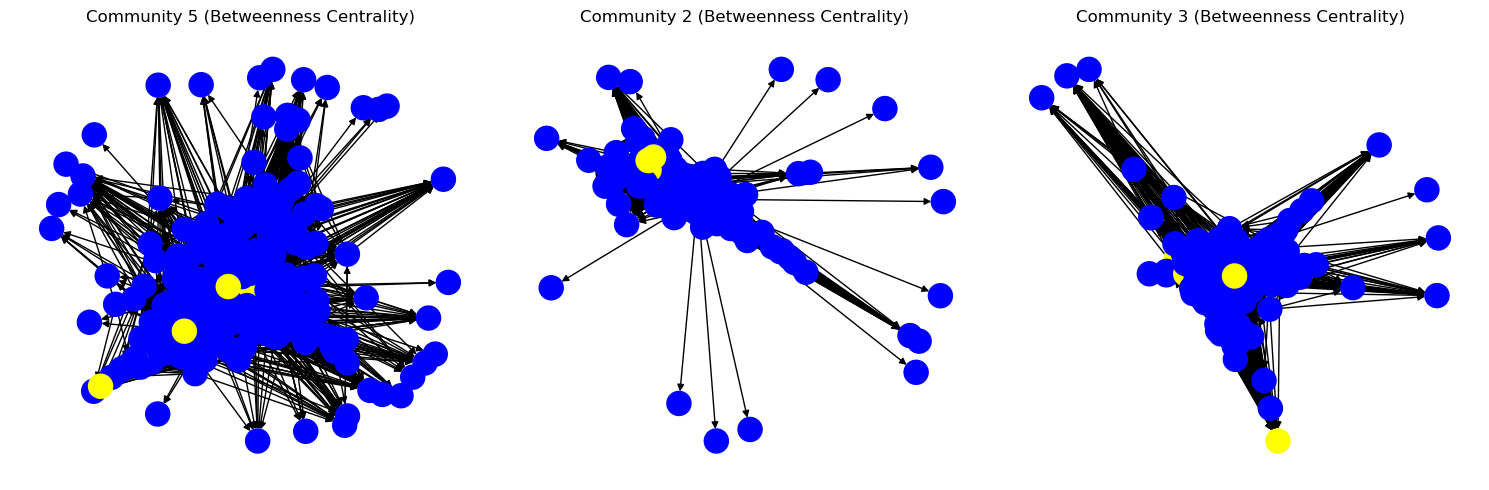

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, community in enumerate(highest_three_community):
    selected_nodes = [n for n, d in directed_graph.nodes(data=True) if d['community'] == community]
    sg = directed_graph.subgraph(selected_nodes)
    node_colors = ['yellow' if node in removed_nodes else 'blue' for node in sg]
    pos = nx.spring_layout(sg, seed=500)
    nx.draw(sg, pos=pos, node_color=node_colors, ax=axs[i])
    axs[i].set_title(f'Community {community} (Betweenness Centrality)')

plt.tight_layout()
plt.show()

### Now let's remove the top 3 nodes with the highest eigenvector centrality for each community

In [20]:
for community in highest_three_community:
    selected_nodes = [n for n, d in directed_graph.nodes(data=True) if d['community'] == community]
    sg = directed_graph.subgraph(selected_nodes)
    eigenvector_centrality = nx.eigenvector_centrality(sg, max_iter=1000)
    top_3_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:3]
    removed_nodes.extend(top_3_nodes)

len(removed_nodes)

36

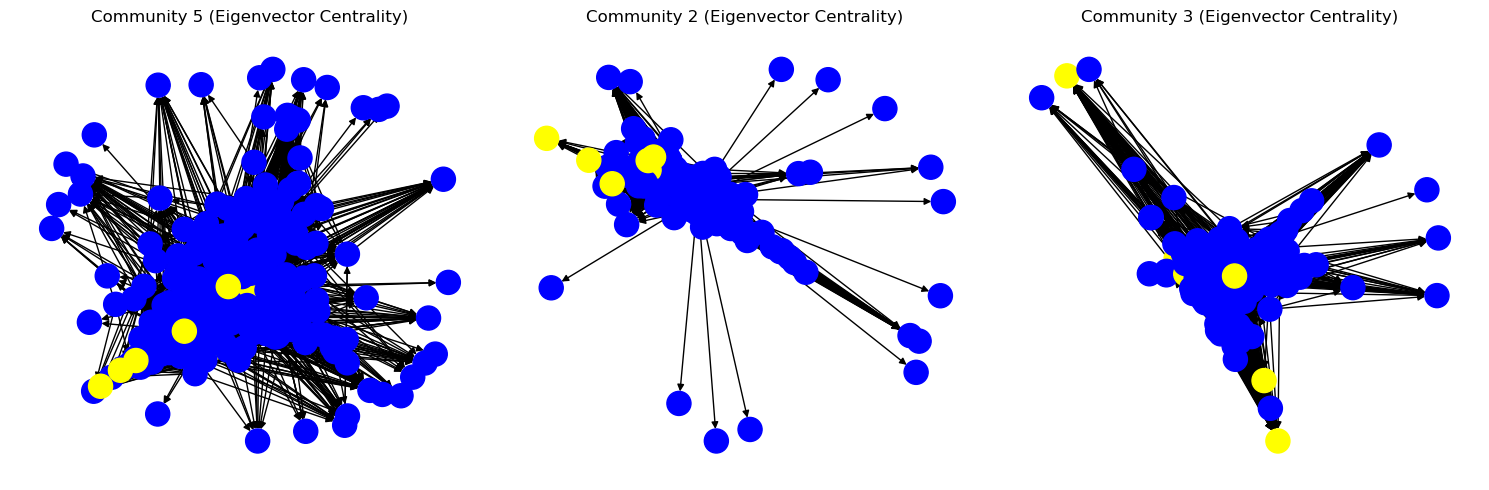

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, community in enumerate(highest_three_community):
    selected_nodes = [n for n, d in directed_graph.nodes(data=True) if d['community'] == community]
    sg = directed_graph.subgraph(selected_nodes)
    node_colors = ['yellow' if node in removed_nodes else 'blue' for node in sg]
    pos = nx.spring_layout(sg, seed=500)
    nx.draw(sg, pos=pos, node_color=node_colors, ax=axs[i])
    axs[i].set_title(f'Community {community} (Eigenvector Centrality)')

plt.tight_layout()
plt.show()

### In this analysis, we examined the largest three communities in a social network, focusing on key nodes based on centrality measures. We identified and highlighted the top 3 nodes in each community for Degree, Closeness, Betweenness, and Eigenvector Centrality. These nodes, marked in yellow, are influential within their communities due to their high connectivity, accessibility, control over information flow, or network influence. The visualization of each community with these central nodes helps us understand the structure and key players in different segments of the network, revealing patterns and influential members in the social structure.

### 10) Draw the influencers of those top 3 communities. 

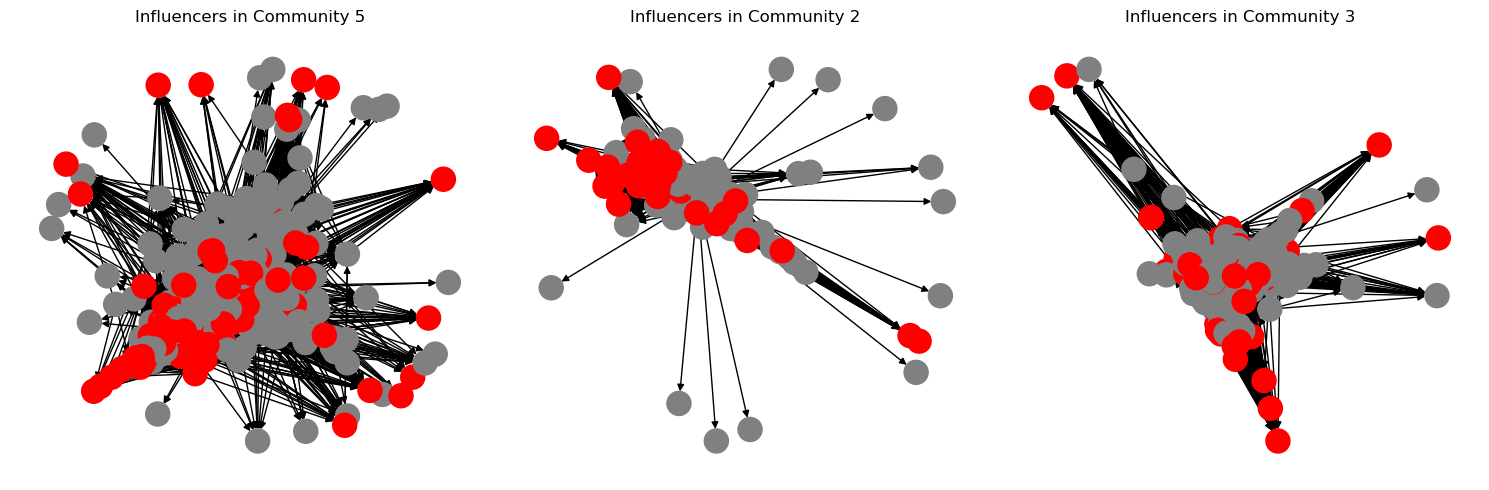

In [24]:
top_percent = 10

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, community in enumerate(highest_three_community):
    selected_nodes = [n for n, d in directed_graph.nodes(data=True) if d['community'] == community]
    sg = directed_graph.subgraph(selected_nodes)

    degree_centrality = nx.degree_centrality(sg)
    closeness_centrality = nx.closeness_centrality(sg)
    betweenness_centrality = nx.betweenness_centrality(sg)
    eigenvector_centrality = nx.eigenvector_centrality(sg, max_iter=1000)

    top_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:len(sg)//top_percent]
    top_closeness = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:len(sg)//top_percent]
    top_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:len(sg)//top_percent]
    top_eigenvector = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:len(sg)//top_percent]

    influencer_nodes = set(top_degree + top_closeness + top_betweenness + top_eigenvector)
    node_colors = ['red' if node in influencer_nodes else 'gray' for node in sg]
    pos = nx.spring_layout(sg, seed=500)
    nx.draw(sg, pos=pos, node_color=node_colors, ax=axs[i])
    influencer_labels = {n: n for n in influencer_nodes}

    axs[i].set_title(f'Influencers in Community {community}')

plt.tight_layout()
plt.show()

### In this visualization, we focus on the top influencers within the three largest communities of a network. Influencers are identified based on key network metrics: Degree, Closeness, Betweenness, and Eigenvector Centrality. Specifically, we select the top 10% of nodes in each metric as influencers. These influencers are highlighted in red, while other nodes are in gray. By doing this, we can easily see which nodes have the most significant impact or connections within their respective communities. This approach helps in understanding the structure and dynamics of the network, particularly in spotting the most influential members.

### 11. Design an action plan: 
### a. Use hypothetical business (telecom, marketing agency, etc.) 
### b. Use a hypothetical marketing budget 
### c. Use a hypothetical cost per action (advertisement cost) 
### d. Decide whom should you target?

# Hypothetical Business
## Business Type
- **Marketing Agency**

## Business Goal
- Maximize the impact of ad campaigns for clients using social network insights.

# Hypothetical Marketing Budget
## Total Budget
- $100,000

## Allocation Strategy
- Allocate budget based on the influence and centrality of nodes in the network.

# Hypothetical Cost Per Action (Advertisement Cost)
## Cost Per Action (CPA)
- $5 per interaction (click, like, share, etc.)

## Budget Allocation Strategy
- Allocate more budget to high-impact nodes (influencers) and communities.

# Targeting Strategy Based on Social Network Analysis
## Focus on Influential Nodes
- **Key Nodes**: Target nodes 107, 1684, 1912, 3437, and 0, identified as having the highest connections.
- **Rationale**: These nodes have high degree centrality and can quickly disseminate information across the network.

## Engage Nodes with High Incoming and Outgoing Connections
- **Key Targets**: Nodes 1888, 2543, 1800, 2611, and 1827 for incoming connections; and 107, 1684, 1912, 3437, 0 for outgoing connections.
- **Rationale**: Nodes with high incoming connections are influential, while those with high outgoing connections are active disseminators of information.

## Leverage Nodes with High Centrality Measures
- **Betweenness**: Node 1684, a crucial bridge in the network.
- **Closeness**: Node 2642, indicating rapid spread potential.
- **Eigenvector**: Node 2655, highly influential within a significant cluster.

## Target Large Communities for Broad Reach
- **Communities**: Focus on the largest communities, such as Community 5.
- **Rationale**: Large communities offer a broad audience for marketing messages.

## Niche Marketing in Small Communities
- **Target**: Smaller communities like Community 36.
- **Rationale**: These could represent niche markets with specific interests.

## Adjust Strategy Post Influencer Removal
- **Post-Removal Analysis**: Reassess the network to identify new influential nodes after removing top nodes in each centrality measure.
- **Rationale**: Ensures the marketing strategy remains robust as network dynamics change.

## Utilize Top 10% Influencers in Key Communities
- **Identification**: Select top influencers in communities 5, 2, and 3 based on the top 10% in centrality measures.
- **Rationale**: These influencers can significantly amplify the marketing message within their respective communities.

# Execution Plan
## Phase 1: Initial Campaign
- Launch targeted ads focusing on key influencers and large communities.
- Monitor interaction rates and adjust targeting as needed.

## Phase 2: Optimization
- Analyze initial campaign results.
- Shift focus to emerging influencers and niche communities for targeted marketing.

## Phase 3: Expansion
- Reinvest in successful strategies and expand to additional communities.
- Continue monitoring and adapting to network changes.

# Measurement of Success
## Key Metrics
- CPA, engagement rate, reach within communities, and conversion rate.

## Evaluation
- Regularly assess the campaign's performance against these metrics to ensure optimal allocation of the marketing budget.

*This action plan leverages the insights gained from the social network analysis, focusing on maximizing the impact of marketing efforts by strategically targeting key nodes and communities within the network.*


### Summary of the strategy - In this project, a marketing agency aims to enhance ad campaigns by leveraging social network insights. With a 100000 USD budget and 5 cost per action, our strategy focuses on nodes with high connectivity, like nodes 107 and 1684, for their wide reach. We're targeting influential nodes, such as 1888 and 2543, known for their high incoming connections, making them key for spreading messages. Additionally, we will concentrate on large communities, like Community 5, for broader impact, and niche communities, like Community 36, for targeted engagement. This approach, backed by our network analysis findings, ensures a balanced and effective use of resources for maximum campaign impact.